In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

X_test,X_val,y_test,y_val = train_test_split(X_test,y_test, test_size=0.2, random_state=42)

X_train, X_test, X_val = X_train / 255.0, X_test / 255.0, X_val/255.0

In [3]:
print(f"X_train: {len(X_train)}")
print(f"X_test: {len(X_test)}")
print(f"y_train: {len(y_train)}")
print(f"y_test: {len(y_test)}")
print(f"X_val: {len(X_val)}")
print(f"y_val: {len(y_val)}")

X_train: 50000
X_test: 8000
y_train: 50000
y_test: 8000
X_val: 2000
y_val: 2000


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
# class labels
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3),strides=(1, 1), padding="same", activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3),strides=(1, 1), padding="same", activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3),strides=(1, 1), padding="same", activation='relu', input_shape=(32, 32, 3)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


In [7]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [8]:
results = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
782/782 [==============================] - 11s 6ms/step - loss: 1.8036 - accuracy: 0.3259 - val_loss: 1.3663 - val_accuracy: 0.5035
Epoch 2/50
782/782 [==============================] - 4s 5ms/step - loss: 1.3474 - accuracy: 0.5265 - val_loss: 1.1050 - val_accuracy: 0.6035
Epoch 3/50
782/782 [==============================] - 5s 6ms/step - loss: 1.1559 - accuracy: 0.6020 - val_loss: 1.0099 - val_accuracy: 0.6475
Epoch 4/50
782/782 [==============================] - 4s 6ms/step - loss: 1.0285 - accuracy: 0.6507 - val_loss: 1.0164 - val_accuracy: 0.6380
Epoch 5/50
782/782 [==============================] - 5s 6ms/step - loss: 0.9373 - accuracy: 0.6808 - val_loss: 0.9168 - val_accuracy: 0.6820
Epoch 6/50
782/782 [==============================] - 5s 6ms/step - loss: 0.8600 - accuracy: 0.7091 - val_loss: 0.8641 - val_accuracy: 0.7030
Epoch 7/50
782/782 [==============================] - 4s 6ms/step - loss: 0.7966 - accuracy: 0.7340 - val_loss: 0.8631 - val_accuracy: 0.7225
Epoch

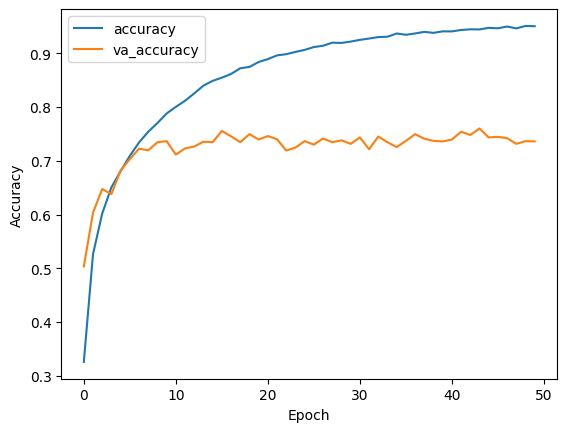

In [9]:
plt.plot(results.history["accuracy"], label="accuracy")
plt.plot(results.history["val_accuracy"], label="va_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

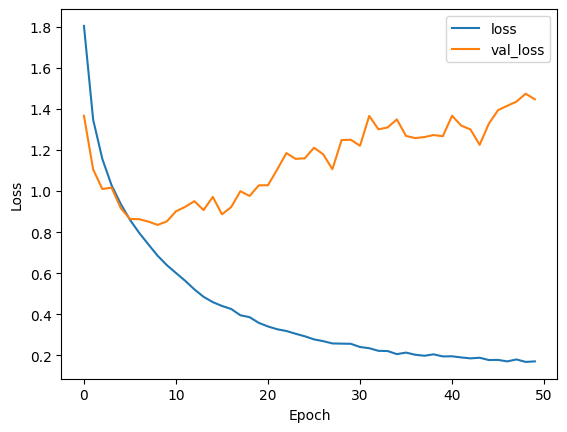

In [10]:
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


250/250 - 2s - loss: 1.4769 - accuracy: 0.7337 - 2s/epoch - 7ms/step
Test accuracy: 0.7337499856948853


In [39]:
rnd = random.randint(0,8000)

In [40]:
#random prediction result
pre_result = model.predict(X_test[rnd].reshape(1,32,32,3))

1/1 [==============================] - 0s 17ms/step


In [41]:
pr_class = pre_result.argmax()

Text(0.5, 1.0, 'horse')

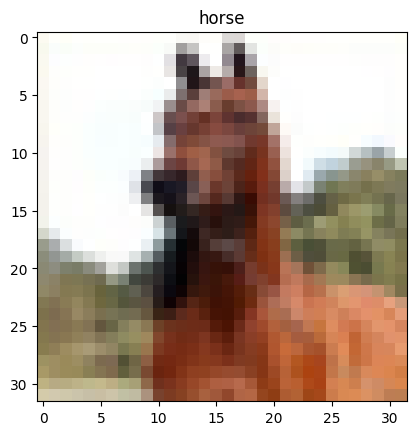

In [42]:
plt.imshow(X_test[rnd])
plt.title(labels[pr_class])